In [1]:
%matplotlib inline

In [1]:
#export
from pathlib import Path
from fastai import datasets as FA_datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

# Setup paths using pathlib and get data

In [2]:
#export
# Path.home() # real home dir of the computer
HOME_DIR = Path('.').resolve()
DATA_DIR = HOME_DIR/"data"
HOME_DIR, DATA_DIR

(PosixPath('/Users/xianli/Desktop/fast/Part2'),
 PosixPath('/Users/xianli/Desktop/fast/Part2/data'))

In [3]:
#export
fname = DATA_DIR/'mnist.pkl.gz'
fpath = FA_datasets.download_data(MNIST_URL,fname,ext='.gz');fpath

PosixPath('/Users/xianli/Desktop/fast/Part2/data/mnist.pkl.gz')

In [5]:
# output to file
# !python notebook2script.py Matmul_Lesson1.ipynb

Converted Matmul_Lesson1.ipynb to exp/nb_Matmul.py


In [5]:
with gzip.open(fpath,'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [6]:
??torch.tensor # use torch.tensor instead of torch.Tensor

Object `torch.tensor # use torch.tensor instead of torch.Tensor` not found.


In [7]:
x_train,y_train,x_valid,y_valid=map(torch.tensor,(x_train,y_train,x_valid,y_valid))

In [8]:
x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

(torch.Size([50000, 784]),
 torch.Size([50000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

In [9]:
y_train[:5]

tensor([5, 0, 4, 1, 9])

In [10]:
mpl.rcParams['image.cmap']='gray'

In [11]:
img = x_train[0]
img.view(28,28).type()

'torch.FloatTensor'

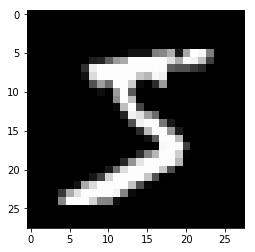

In [12]:
plt.imshow(img.view(28,28))

# parameter initialization

In [18]:
weights = torch.randn(784,10)
bias = torch.zeros(10)
weights.shape, bias.shape

(torch.Size([784, 10]), torch.Size([10]))

# Matrix multiplication

In [35]:
# brute force
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                    c[i,j] += a[i,k]*b[k,j]
    return c

In [23]:
m1 = x_valid[:5]
m2 = weights

In [58]:
ans = m1@m2
ans.shape

torch.Size([5, 10])

In [36]:
%time t1=matmul(m1,m2)

CPU times: user 924 ms, sys: 6.3 ms, total: 930 ms
Wall time: 935 ms


### elementwise

In [48]:
# elementwise
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i,:]*b[:,j]).sum()
    return c

In [49]:
%time t2=matmul(m1,m2)

CPU times: user 3.44 ms, sys: 359 µs, total: 3.8 ms
Wall time: 3.55 ms


In [57]:
torch.allclose(t2,ans)

True

### broadcasting

In [69]:
# a[i,:] is broadcasted to all rows
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        c[i] = (a[i]*b.t()).sum(dim=1)
    return c

In [70]:
%time t3 =matmul(m1,m2)

CPU times: user 1.03 ms, sys: 1.57 ms, total: 2.6 ms
Wall time: 9 ms


In [71]:
torch.allclose(t3,ans)

True

In [72]:
m1[1].unsqueeze(-1).shape

torch.Size([784, 1])

In [78]:
# a[i] is turned to column vector and broadcasted to all columns
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        c[i] = (a[i].unsqueeze(-1)*b).sum(dim=0)
    return c

In [79]:
%time t4 =matmul(m1,m2)

CPU times: user 824 µs, sys: 490 µs, total: 1.31 ms
Wall time: 765 µs


In [80]:
torch.allclose(t4,ans)

True

In [81]:
def matmul(a,b):
    return torch.einsum('ik,kj->ij',a,b)

In [82]:
%time t5 =matmul(m1,m2)

CPU times: user 1.54 ms, sys: 3.07 ms, total: 4.61 ms
Wall time: 31.7 ms


In [83]:
%time t6 = m1@m2 # winner!

CPU times: user 66 µs, sys: 0 ns, total: 66 µs
Wall time: 70.1 µs


In [84]:
%time t7 = m1.matmul(m2) # should be the same?

CPU times: user 142 µs, sys: 48 µs, total: 190 µs
Wall time: 107 µs
